In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

In [2]:
os.chdir(r'C:\Users\ROHAN\Downloads')

In [3]:
df=pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [6]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
df['Sex']=pd.get_dummies(df['Sex'],drop_first=True)

In [8]:
df['Ticket']=pd.get_dummies(df['Ticket'],drop_first=True)

In [9]:
df['Embarked']=pd.get_dummies(df['Embarked'],drop_first=True)

In [10]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex              uint8
Age            float64
SibSp            int64
Parch            int64
Ticket           uint8
Fare           float64
Cabin           object
Embarked         uint8
dtype: object

In [11]:
df.drop("Name", axis = 1, inplace=True)

In [12]:
df.drop("Cabin", axis = 1, inplace=True)

In [13]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

In [14]:
df.fillna(value=df['Age'].median(),inplace=True)

In [15]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

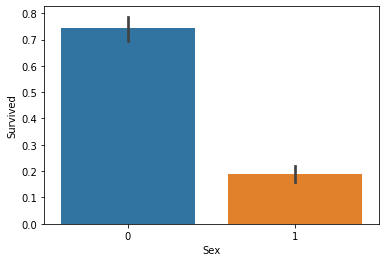

In [16]:
sns.barplot(x='Sex', y='Survived', data=df)

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [19]:
x=df.drop(columns=['Survived'])   
y=df['Survived']

In [20]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(x)

In [21]:
X_scaled

array([[-1.73010796,  0.82737724,  0.73769513, ..., -0.05812382,
        -0.50244517, -0.30756234],
       [-1.72622007, -1.56610693, -1.35557354, ..., -0.05812382,
         0.78684529, -0.30756234],
       [-1.72233219,  0.82737724, -1.35557354, ..., -0.05812382,
        -0.48885426, -0.30756234],
       ...,
       [ 1.72233219,  0.82737724, -1.35557354, ..., -0.05812382,
        -0.17626324, -0.30756234],
       [ 1.72622007, -1.56610693,  0.73769513, ..., -0.05812382,
        -0.04438104, -0.30756234],
       [ 1.73010796,  0.82737724,  0.73769513, ..., -0.05812382,
        -0.49237783,  3.25137334]])

In [23]:
x_train, x_test, y_train, y_test = train_test_split(X_scaled,y, test_size= 0.2, random_state = 355)

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score,  classification_report

In [25]:
logreg=LogisticRegression()
logreg.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
REG=logreg.score(x_train, y_train)
REG

0.8019662921348315

In [27]:
y_pred = logreg.predict(x_test)

In [28]:
logreg.score(x_test,y_test)

0.7597765363128491

In [29]:
conf_mat = confusion_matrix(y_test,y_pred)
conf_mat

array([[96, 23],
       [20, 40]], dtype=int64)

In [31]:
Precision = true_positive/(true_positive+false_positive)  
Precision

0.8067226890756303

In [32]:
Recall = true_positive/(true_positive+false_negative)  
Recall

0.8275862068965517

In [33]:
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8170212765957446

In [34]:
auc = roc_auc_score(y_test, y_pred)
auc

0.7366946778711484

In [35]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

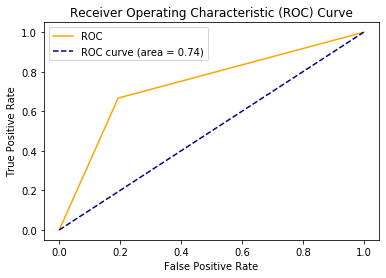

In [36]:
plt.plot(fpr, tpr, color='orange', label='ROC')
plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--',label='ROC curve (area = %0.2f)' % auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

DECISION TREE

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
from sklearn.model_selection import train_test_split,GridSearchCV

In [38]:
df=pd.read_csv('titanic1.csv')

In [39]:
x=df.drop(columns=['Survived'])   
y=df['Survived']

In [40]:
decclf=DecisionTreeClassifier()
decclf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [42]:
decclf.score(x_train, y_train)

1.0

In [47]:
py_pred=decclf.predict(x_test)
add=decclf.score(x_test, y_test)

In [48]:
add

0.7262569832402235

In [49]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,32,1),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [51]:
grid_search = GridSearchCV(estimator=decclf,
                     param_grid=grid_param,
                     cv=5,
                    n_jobs =-1)

In [52]:
grid_search.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                     

In [53]:
best_parameters = grid_search.best_params_
print(best_parameters)

{'criterion': 'gini', 'max_depth': 26, 'min_samples_leaf': 4, 'min_samples_split': 4, 'splitter': 'random'}


In [66]:
clf = DecisionTreeClassifier(criterion = 'gini', max_depth =22, min_samples_leaf= 4, min_samples_split= 2, splitter ='random')
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=22, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=4, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='random')

In [67]:
auc_dt=clf.score(x_test, y_test)
auc_dt

0.8268156424581006